<a href="https://colab.research.google.com/github/ananyaa06/Create-A-Thon-Fantastic-4/blob/main/Homelessness_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to data source (also has the link to the data dictionary)  https://www.huduser.gov/portal/datasets//hpmd.html

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv("https://www.huduser.gov/portal/sites/default/files/xls/05b_analysis_file_update.csv")

# FUNCTIONS

In [ ]:
def generate_data(outcome_var):

  # CREATE LISTS FOR OUTCOME VARIABLES
  outcomes = list(dataset.keys())[2:5] + ["pit_miss", 
                                        "odd_flag", 
                                        "pit_hless_balance", 
                                        "pit_shelt_balance", 
                                        "pit_unshelt_balance", 
                                        "unbalance_flag", 
                                        "pit_shelt_pit_hud_share", 
                                        "pit_unshelt_pit_hud_share",
                                        "pit_hless_pit_hud_share",
                                        "missing"]
                                        
  secondary_outcomes = list(dataset.keys())[5:14] + list(dataset.keys())[17:22]

  # ISOLATE TRAINING FEATURES FROM TOTAL DATASET
  features_df = dataset.drop(["year", "cocnumber", "coctag", "panelvar", "state_abr"] + outcomes + secondary_outcomes, axis=1, inplace=False)

  # CREATE DATAFRAME OF ALL OUTCOME VARIABLE DATA
  possible_outcomes_df = dataset[outcomes + secondary_outcomes]

  # IDENTIFY (AND DROP) FEATURES WITH MANY NAN VALUES
  NaN_features = []

  for key in features_df.keys():
    if features_df[key].isna().sum() > 300:
      NaN_features.append(key)

  features_df.drop(NaN_features, axis=1, inplace=True)

  # FILL IN THE FEW REMAINING NAN VALUES WITH COLUMN-WISE AVERAGE
  for key in features_df.keys():
    # print(key)
    features_df[key].fillna(value=round(features_df[key].mean()), inplace=True)

  # ADDING OUTCOME VAR TO THE END OF THE DATASET
  features_df[outcome_var] = possible_outcomes_df[outcome_var]

  # DROP THE NAN VALUES THAT ARE PRESENT IN THE OUTCOME VAR
  final_df = features_df.dropna()
  print(final_df.shape)

  return final_df


In [ ]:
def get_train_test_data(data):

  X = data.iloc[:, :-1].values
  y = data.iloc[:, -1].values
  #I just wrote this assuming we're using the last variable for the predicted variable but we can change it accordingly

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 6)

  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  return X_train, X_test, y_train, y_test

In [ ]:
# function for training and testing different models

def train_and_test_func(X_train, X_test, y_train, y_test, graph_title):

  from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, BayesianRidge
  import matplotlib.pyplot as plt

  models = []
  scores = []

  print("Model:".ljust(20), "R2 Score:")
  print()

  lr = LinearRegression()
  lr.fit(X_train, y_train)
  print("Linear Regression:".ljust(20), lr.score(X_test, y_test))
  models.append("Linear Regression")
  scores.append(round(lr.score(X_test, y_test), 3))

  en = ElasticNet()
  en.fit(X_train, y_train)
  print("ElasticNet:".ljust(20), en.score(X_test, y_test))
  models.append("ElasticNet")
  scores.append(round(en.score(X_test, y_test), 3))

  rd = Ridge()
  rd.fit(X_train, y_train)
  print("Ridge:".ljust(20), rd.score(X_test, y_test))
  models.append("Ridge")
  scores.append(round(rd.score(X_test, y_test), 3))

  ls = Lasso()
  ls.fit(X_train, y_train)
  print("Lasso:".ljust(20), ls.score(X_test, y_test))
  models.append("Lasso")
  scores.append(round(ls.score(X_test, y_test), 3))

  br = BayesianRidge()
  br.fit(X_train, y_train)
  print("Bayesian Ridge:".ljust(20), br.score(X_test, y_test))
  models.append("Bayesian Ridge")
  scores.append(round(br.score(X_test, y_test), 3))

  #---

  # y_pos = np.arange(len(models))

  # plt.bar(y_pos, scores, align='center', alpha=0.5)
  # # add_value_label(models, scores)
  # plt.xticks(y_pos, models)
  # plt.ylabel('R2 Score')
  # plt.title(f"Performance on: {graph_title}")

  # plt.ylim(0,1)
  # plt.xticks(rotation=30, ha='center')

  # plt.show()

  print()
  return scores

# MODEL EXPERIMENTATION

In [ ]:
# PRINT NAN COUNT FOR EACH OF THE POSSIBLE OUTCOME VARIABLES

outcomes = list(dataset.keys())[2:5] + ["pit_miss", 
                                      "odd_flag", 
                                      "pit_hless_balance", 
                                      "pit_shelt_balance", 
                                      "pit_unshelt_balance", 
                                      "unbalance_flag", 
                                      "pit_shelt_pit_hud_share", 
                                      "pit_unshelt_pit_hud_share",
                                      "pit_hless_pit_hud_share",
                                      "missing"]
                                      
secondary_outcomes = list(dataset.keys())[5:14] + list(dataset.keys())[17:22]

possible_outcomes_df = dataset[outcomes + secondary_outcomes]

#--
print("Key:".ljust(35), "NaN Count")
print()

for key in possible_outcomes_df.keys():
  print(key.ljust(35), possible_outcomes_df[key].isna().sum())


Key:                                NaN Count

pit_tot_shelt_pit_hud               14
pit_tot_unshelt_pit_hud             14
pit_tot_hless_pit_hud               14
pit_miss                            0
odd_flag                            0
pit_hless_balance                   0
pit_shelt_balance                   0
pit_unshelt_balance                 0
unbalance_flag                      0
pit_shelt_pit_hud_share             14
pit_unshelt_pit_hud_share           14
pit_hless_pit_hud_share             14
missing                             0
pit_ind_shelt_pit_hud               14
pit_ind_unshelt_pit_hud             14
pit_ind_hless_pit_hud               14
pit_perfam_shelt_pit_hud            14
pit_perfam_unshelt_pit_hud          14
pit_perfam_hless_pit_hud            14
pit_ind_chronic_hless_pit_hud       14
pit_perfam_chronic_hless_pit_hud    1137
pit_vet_hless_pit_hud               387
hou_pol_totalind_hud                2259
hou_pol_totalday_hud                2259
hou_pol_totalexit

(2994, 190)
Model:               R2 Score:

Linear Regression:   0.9899263638982593
ElasticNet:          0.9640001079830204
Ridge:               0.9899883673750962


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+06, tolerance: 2.361e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso:               0.9900745452152064
Bayesian Ridge:      0.9899824187506459

(2994, 190)
Model:               R2 Score:

Linear Regression:   0.8274848597311554
ElasticNet:          0.7050886023202613
Ridge:               0.8130233574301412


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.308e+07, tolerance: 6.747e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso:               0.8119341350871482
Bayesian Ridge:      0.8054330239788843

(2994, 190)
Model:               R2 Score:

Linear Regression:   0.97348827352747
ElasticNet:          0.9455920230172994
Ridge:               0.9711179607149042


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.944e+08, tolerance: 3.838e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso:               0.9703609458532152
Bayesian Ridge:      0.9697135897530513



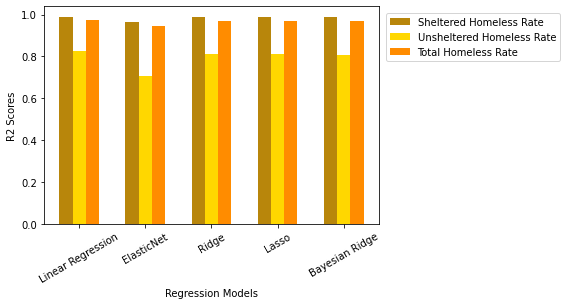

In [ ]:
import matplotlib.pyplot as plt

models = ["Linear Regression", "ElasticNet", "Ridge", "Lasso", "Bayesian Ridge"]
x = np.arange(len(models))
width = 0.2

# GENERATE DATA BASED ON OUTCOME VARIABLE
DATA = generate_data(outcome_var = "pit_tot_shelt_pit_hud") # ths outcome variable can be adjusted to whatever we want
X_train, X_test, y_train, y_test = get_train_test_data(DATA)
scores = train_and_test_func(X_train, X_test, y_train, y_test, "Sheltered Homeless per 10,000")

plt.bar(x-0.2, scores, width, color='darkgoldenrod')

# GENERATE DATA BASED ON OUTCOME VARIABLE
DATA = generate_data(outcome_var = "pit_tot_unshelt_pit_hud") # ths outcome variable can be adjusted to whatever we want
X_train, X_test, y_train, y_test = get_train_test_data(DATA)
scores = train_and_test_func(X_train, X_test, y_train, y_test, "Unsheltered Homeless per 10,000")

plt.bar(x, scores, width, color='gold')


# GENERATE DATA BASED ON OUTCOME VARIABLE
DATA = generate_data(outcome_var = "pit_tot_hless_pit_hud") # ths outcome variable can be adjusted to whatever we want
X_train, X_test, y_train, y_test = get_train_test_data(DATA)
scores = train_and_test_func(X_train, X_test, y_train, y_test, "Total Homeless per 10,000")

plt.bar(x+0.2, scores, width, color='darkorange')

plt.xticks(x, models)
plt.xticks(rotation=30, ha="center")
plt.xlabel("Regression Models")
plt.ylabel("R2 Scores")
plt.legend(["Sheltered Homeless Rate", "Unsheltered Homeless Rate", "Total Homeless Rate"], bbox_to_anchor=(1.02, 0.75), loc="lower left", borderaxespad=0)

plt.show()



In [ ]:
from sklearn.linear_model import LinearRegression

DATA = generate_data(outcome_var = "pit_tot_shelt_pit_hud") # ths outcome variable can be adjusted to whatever we want
X_train, X_test, y_train, y_test = get_train_test_data(DATA)

lr = LinearRegression()
lr.fit(X_train, y_train)



(2994, 190)


LinearRegression()

In [ ]:
sorted(zip(np.abs(lr.coef_), DATA.keys()), reverse=True)

In [ ]:
dataset

,year,cocnumber,pit_tot_shelt_pit_hud,pit_tot_unshelt_pit_hud,pit_tot_hless_pit_hud,pit_ind_shelt_pit_hud,pit_ind_unshelt_pit_hud,pit_ind_hless_pit_hud,pit_perfam_shelt_pit_hud,pit_perfam_unshelt_pit_hud,...,sub_high_cost_rent75,sub_high_cost_homeval75,sub_high_rent_share75,tight_high_cost_rental_mkt,sub_tight_high_cost_rent,sub_west_coast_all_urb,sub_west_census,major_city,suburban,rural
0,2010,AK-500,1113.0,118.0,1231.0,633.0,107.0,740.0,480.0,11.0,...,1,1,1,3,1,1,1,1,0,0
1,2011,AK-500,1082.0,141.0,1223.0,677.0,117.0,794.0,405.0,24.0,...,1,1,0,3,1,1,1,1,0,0
2,2012,AK-500,1097.0,50.0,1147.0,756.0,35.0,791.0,341.0,15.0,...,1,1,1,3,1,1,1,1,0,0
3,2013,AK-500,1070.0,52.0,1122.0,792.0,52.0,844.0,278.0,0.0,...,1,1,0,3,1,1,1,1,0,0
4,2014,AK-500,970.0,53.0,1023.0,688.0,48.0,736.0,282.0,5.0,...,1,1,1,3,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,2013,WY-500,501.0,452.0,953.0,306.0,371.0,677.0,195.0,81.0,...,0,0,0,0,0,0,1,0,0,1
3004,2014,WY-500,563.0,194.0,757.0,327.0,136.0,463.0,236.0,58.0,...,1,1,1,3,1,0,1,0,0,1
3005,2015,WY-500,507.0,291.0,798.0,292.0,208.0,500.0,215.0,83.0,...,0,0,0,0,0,0,1,0,0,1
3006,2016,WY-500,491.0,366.0,857.0,277.0,240.0,517.0,214.0,126.0,...,1,1,1,3,1,0,1,0,0,1


# Code Graveyard

In [ ]:
# options for our predicted variables
outcomes = list(dataset.keys())[2:5] + ["pit_miss", 
                                        "odd_flag", 
                                        "pit_hless_balance", 
                                        "pit_shelt_balance", 
                                        "pit_unshelt_balance", 
                                        "unbalance_flag", 
                                        "pit_shelt_pit_hud_share", 
                                        "pit_unshelt_pit_hud_share",
                                        "pit_hless_pit_hud_share",
                                        "missing"]
                                        
secondary_outcomes = list(dataset.keys())[5:14] + list(dataset.keys())[17:22]
print(outcomes)
print(secondary_outcomes)

['pit_tot_shelt_pit_hud', 'pit_tot_unshelt_pit_hud', 'pit_tot_hless_pit_hud', 'pit_miss', 'odd_flag', 'pit_hless_balance', 'pit_shelt_balance', 'pit_unshelt_balance', 'unbalance_flag', 'pit_shelt_pit_hud_share', 'pit_unshelt_pit_hud_share', 'pit_hless_pit_hud_share', 'missing']
['pit_ind_shelt_pit_hud', 'pit_ind_unshelt_pit_hud', 'pit_ind_hless_pit_hud', 'pit_perfam_shelt_pit_hud', 'pit_perfam_unshelt_pit_hud', 'pit_perfam_hless_pit_hud', 'pit_ind_chronic_hless_pit_hud', 'pit_perfam_chronic_hless_pit_hud', 'pit_vet_hless_pit_hud', 'hou_pol_totalind_hud', 'hou_pol_totalday_hud', 'hou_pol_totalexit_hud', 'hou_pol_numret6mos_hud', 'hou_pol_numret12mos_hud']


In [ ]:
possible_outcomes_df = dataset[outcomes + secondary_outcomes]

In [ ]:
# isolate training feaures (dropping identifiers and outcome columns)
features_df = dataset.drop(["year", "cocnumber", "coctag", "panelvar", "state_abr"] + outcomes + secondary_outcomes, axis=1, inplace=False)

In [ ]:
# Identifying features with lots of NaN(missing) values
NaN_features = []

for key in features_df.keys():
  if features_df[key].isna().sum() > 300:
    NaN_features.append(key)
  # print(key.ljust(35), features_df[key].isna().sum())

In [ ]:
#Dropping the Nan features
features_df.drop(NaN_features, axis=1, inplace=True)
# features_df

In [ ]:
# filling the remaining NaNs with the mean of the column
for key in features_df.keys():
  # print(key)
  features_df[key].fillna(value=round(features_df[key].mean()), inplace=True)

In [ ]:
# Adding our outcome var to the end of the dataset
features_df[outcome_var] = possible_outcomes_df[outcome_var]
# features_df

In [ ]:
outcome_var = "pit_tot_shelt_pit_hud"

In [ ]:
# Drop the 14 (or however many) NaN values are present in the outcome var
dataset = features_df.dropna()

In [ ]:
# I'VE COMMENTED THIS OUT FOR NOW BECAUSE 0 COLUMNS WERE LABEL ENCODED
# (still keeping the code in case we need it later)

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le_count = 0
# for col in DATA.columns[1:]:
#     if DATA[col].dtype == 'object':
#         if len(list(DATA[col].unique())) <= 2:
#             le.fit(DATA[col])
#             DATA[col] = le.transform(DATA[col])
#             le_count += 1
# print('{} columns were label encoded.'.format(le_count))

0 columns were label encoded.


In [ ]:
# I'VE COMMENTED THIS OUT FOR NOW BECAUSE 0 COLUMNS WERE ONE-HOT ENCODED
# (still keeping the code in case we need it later)

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct_count = 0
# for col in DATA.columns[1:]:
#     if DATA[col].dtype == 'object':
#         if len(list(DATA[col].unique())) >= 2:
#           DATA = pd.concat([DATA,pd.get_dummies(DATA[col], prefix=col)], axis=1)
#           DATA.drop([col],axis=1, inplace=True)
#           ct_count += 1
# print('{} columns were one-hot encoded.'.format(ct_count))


0 columns were one-hot encoded.
